# Homework 4 Spring 2022

Due 04/18 23:59 

### Name-Rakshith Kamath

### UNI-rk3165

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pprint 
pp = pprint.PrettyPrinter(indent=4)
import tensorflow as tf

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.optimizers import SGD
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Part 1: Feed forward network from scratch!

For this part, you are not allowed to use any library other than numpy. 

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) for the following neural network:

<img src="images/nn.png" width=400 height=400/>

The weight matrix for the hidden layer is W1 and has bias b1. 

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is **sigmoid** for both hidden and output layer

Loss function is the MSE loss $$L(y,y_t) = \frac{1}{2N}\sum_{n=1}^{N}(y^n - y_{t}^{n})^2$$

Refer to the below dictionary for dimensions for each matrix

In [4]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 =  np.dot(H, weights['W2'].T)  + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [7]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    
    dLdb2 = dLdZ2
    dLdb2 = np.sum(dLdb2, axis=0)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)
    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    dLdW1 = np.dot(X.T, dLdZ1)
    dLdb1 = dLdZ1
    dLdb1 = np.sum(dLdb1, axis=0)
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [8]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [9]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 
'b1': array([ 0.00492, -0.000581, -0.00066]). You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

You can use any library for the following questions.

# Part 2: Fashion MNIST dataset
The Fashion-MNIST dataset is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It's commonly used as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning models. You can read more about the dataset at the [Fashion-MNIST homepage](https://github.com/zalandoresearch/fashion-mnist). 

We will utilize tensorflow to import the dataset, however, feel free to use any framework (TF/PyTorch) to answer the assignment questions.

In [56]:
from tensorflow.keras.datasets import fashion_mnist

# load data
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 2.1 Plot the first 25 samples from both development and test sets on two separate 5$\times $5 subplots. 

Each image in your subplot should be labelled with the ground truth label. Get rid of the plot axes for a nicer presentation. You should also label your plots to indicate if the plotted data is from development or test set. You are given the expected output for development samples.

In [11]:
xdev_image = xdev[:25,:,:]
ydev_image = ydev[:25]
xtest_image = xtest[:25,:,:]
ytest_image = ytest[:25]

<Figure size 1800x1080 with 0 Axes>

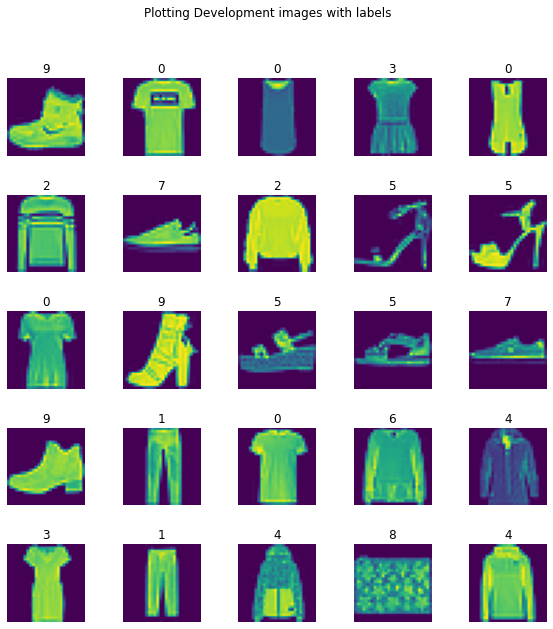

In [12]:
# Plot dev samples
plt.figure(figsize=(25,15))
fig, axes = plt.subplots(nrows=5, ncols=5,figsize=(10,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Plotting Development images with labels')

for ax, feature, name in zip(axes.flatten(), xdev_image, ydev_image):
    ax.imshow(feature)
    ax.axis('off')
    ax.set(title=name)

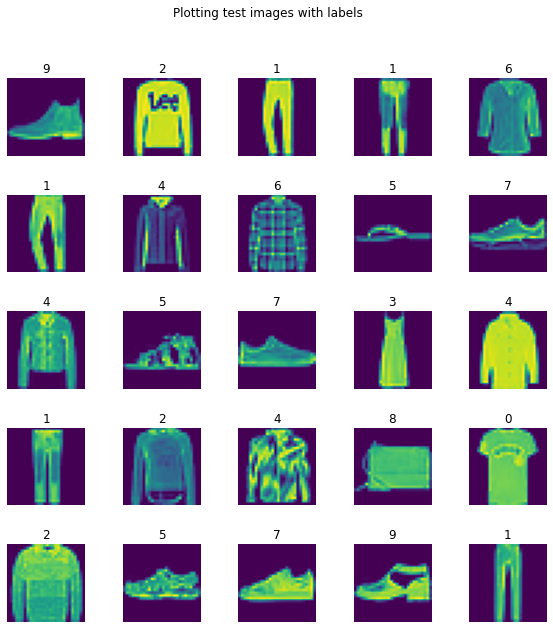

In [13]:
# Plot test samples
fig, axes = plt.subplots(nrows=5, ncols=5,figsize=(10,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Plotting test images with labels')

for ax, feature, name in zip(axes.flatten(), xtest_image, ytest_image):
    ax.imshow(feature)
    ax.axis('off')
    ax.set(title=name)

# Part 3: Feed Forward Network

In this part of the homework, we will build and train a deep neural network on the Fashion-MNIST dataset.

### 3.1.1 Print their shapes - $x_\text{dev}, y_{\text{dev}}, x_\text{test}, y_\text{test}$

In [57]:
# Print
print(f"shape of xdev is {xdev.shape}")
print(f"shape of ydev is {ydev.shape}")
print(f"shape of xtest is {xtest.shape}")
print(f"shape of ytest is {ytest.shape}")

shape of xdev is (60000, 28, 28)
shape of ydev is (60000,)
shape of xtest is (10000, 28, 28)
shape of ytest is (10000,)


### 3.1.2 Flatten the images into one-dimensional vectors. Again, print out the shapes of $x_\text{dev}, x_\text{test}$

In [54]:
# Flatten and print
xdev_flatten=np.reshape(xdev,(xdev.shape[0],-1))
xtest_flatten=np.reshape(xtest,(xtest.shape[0],-1))
print(f"shape of xdev is {xdev_flatten.shape}")
print(f"shape of ydev is {xtest_flatten.shape}")

shape of xdev is (60000, 784)
shape of ydev is (10000, 784)


### 3.1.3 Standardize the development and test sets. 

Note that the images are 28x28 numpy arrays, and each pixel takes value from 0 to 255.0. 0 means background (white), 255 means foreground (black).

In [16]:
# Standardize
xdev_flatten=xdev_flatten/255
xtest_flatten=xtest_flatten/255

### 3.1.4 Assume your neural network has softmax activation as the last layer activation. Would you consider encoding your target variable? Which encoding would you choose and why? The answer depends on your choice of loss function too, you might want to read 2.2.1 and 2.2.5 before answering this one!

Encode the target variable else provide justification for not doing so. Supporting answer may contain your choice of loss function.


**Answer**-
Yes, I have considered using encoding target variable here.
Since this is a multi-class classification problem for predicting the target class for the fashion MNIST dataset and we have a softmax activation at the last layer which gives the probabilities of each class that can be assigned, we are doing one hot encoding of the target variable.Since we have used One Hot Encoding the loss function for the same would be to use categorical_crossentropy loss function.

In [17]:
# answer
ydev = to_categorical(ydev, num_classes=None, dtype='float32')
ytest = to_categorical(ytest, num_classes=None, dtype='float32')

### 3.1.5 Train-test split your development set into train and validation sets (8:2 ratio). 

Note that splitting after encoding does not causes data leakage here because we know all the classes beforehand.

In [18]:
Xtrain,Xval,ytrain,yval = train_test_split(xdev_flatten,ydev,test_size=0.2, random_state=42)

### 3.2.1 Build the feed forward network

Using Softmax activation for the last layer and ReLU activation for every other layer, build the following model:

1. First hidden layer size - 128
2. Second hidden layer size - 64
3. Third and last layer size - You should know this



In [19]:
# build model
model = Sequential([
    Dense(128,input_shape=(784,),activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

2022-04-20 21:32:59.196312: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 3.2.2 Print out the model summary

In [20]:
# print summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### 3.2.3 Report the total number of trainable parameters. Do you think this number is dependent on the image height and width? Only Yes/No required. 

# Answer
Total number of trainable parameters is 109,386.

Yes, it depends on image height and width

### 3.2.4 Print out your model's output on first train sample. This will confirm if your dimensions are correctly set up. Is the sum of this output equal to 1 upto two decimal places?

In [21]:
# answer
print(f"Output probabilites-{model.predict(Xtrain[:1])}")
print(f"Sum of all the terms {np.sum(model.predict(Xtrain[:1])):.2f}")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Output probabilites-[[0.0681811  0.11559495 0.10691907 0.0965947  0.04230984 0.0723356
  0.18999329 0.14038369 0.09736377 0.07032399]]
Sum of all the terms 1.00


### 3.2.5 Considering the output of your model and overall objective, what loss function would you choose and why? Choose a metric for evaluation and explain the reason behind your choice.

# Answer

The output of the model is the probabilities of the given image to be in a particular class. The objective of the model is to predict the class for a given image.Hence, we have used categorical_crossentropy loss function.
We have used accuracy as metric since this is a multi-class classification problem the aim is to check if the predicted labels of the model are in line with the ground truth



### 3.2.6 Using the metric and loss function above, with Adam as the optimizer, train your model for 20 epochs with batch size 128. 

Make sure to save and print out the values of loss function and metric after each epoch for both train and validation sets.

Note - Use appropriate learning rate for the optimizer, you might have to try different values

In [22]:
model.compile("adam","categorical_crossentropy",metrics=["accuracy"])

In [23]:
# train
print("Fit model on training data")
history = model.fit(
    Xtrain,
    ytrain,
    batch_size=128,
    epochs=20,
    validation_data=(Xval, yval),
    verbose = 1
)

Fit model on training data
Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
368/375 [============================>.] - ETA: 0s - loss: 0.6002 - accuracy: 0.7916WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd8ca40bc20> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export 

### 3.2.7 Plot two separate plots displaying train vs validation loss and train vs validation metric scores over each epoch

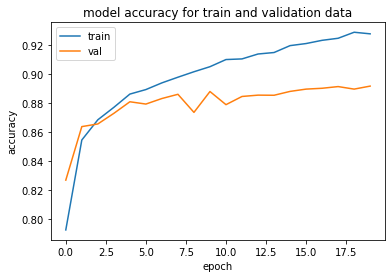

In [24]:
# plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for train and validation data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

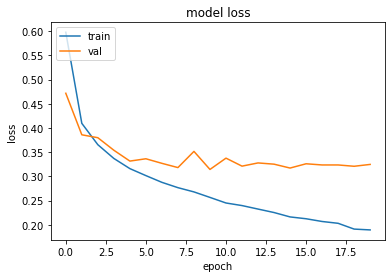

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 3.3.1 Report metric score on test set

In [26]:
# evaluate
score = model.evaluate(xtest_flatten,ytest,verbose =0)
print(f"Test Loss: {score[0]:.3}")
print(f"Test Accuracy:{score[1]:.3}")

Test Loss: 0.342
Test Accuracy:0.886


### 3.3.2 Plot confusion matrix on the test set and label the axes appropriately with true and predicted labels. 

Labels on the axes should be the original classes (0-9) and not one-hot-encoded. To achieve this, you might have to reverse transform your model's predictions. Please look into the documentation of your target encoder. Sample output is provided

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Text(0.5, 1.0, 'confusion matrix for the predictions and actiual labels for the test dataset')

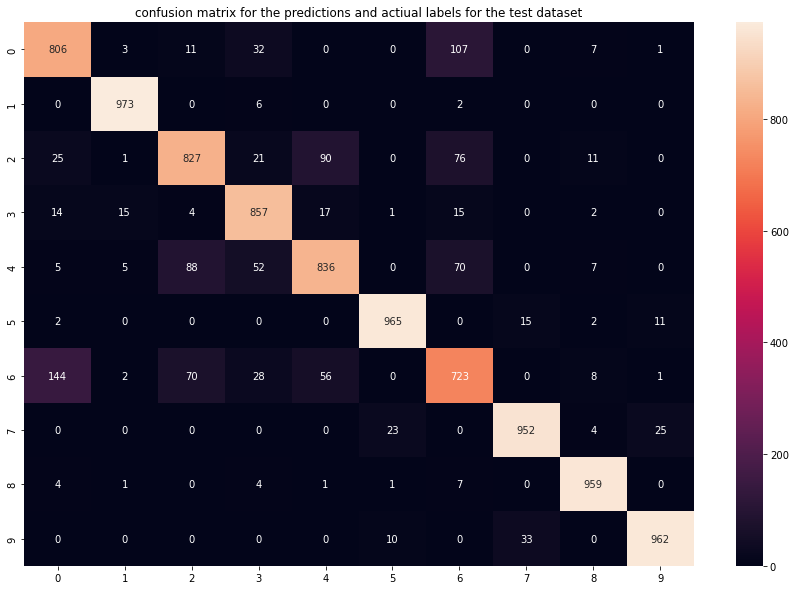

In [27]:
# confusion matrix
ypred=model.predict(xtest_flatten)
ypred=np.argmax(ypred,axis=1)
plt.figure(figsize = (15,10))
sns.heatmap(confusion_matrix(ypred,np.argmax(ytest,axis=1)),annot=True,fmt='d')
plt.title("confusion matrix for the predictions and actiual labels for the test dataset")

### 3.3.3 Plot the first 25 samples of test dataset on a 5$\times $5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). 

For instance, an image of class 3, with predicted class 7 should have the label GT:3, P:7. Get rid of the plot axes for a nicer presentation.

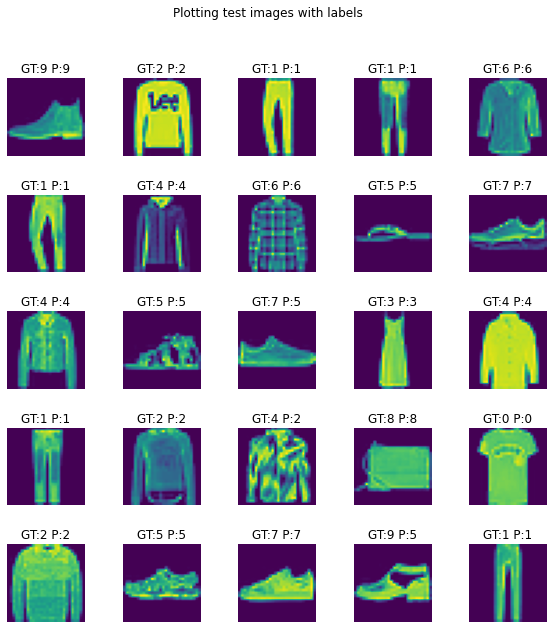

In [28]:
# Plot with predictions
ypred_image=ypred[:25]
fig, axes = plt.subplots(nrows=5, ncols=5,figsize=(10,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Plotting test images with labels')

for ax, feature, name,pred in zip(axes.flatten(), xtest_image, ytest_image,ypred_image):
    ax.imshow(feature)
    ax.axis('off')
    ax.set(title=f"GT:{name} P:{pred}")

# Part 4: Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network, LeNet-5, on the Fashion-MNIST dataset. 

In [29]:
from tensorflow.keras.datasets import fashion_mnist

# load data again
(xdev, ydev), (xtest, ytest) = fashion_mnist.load_data()

### 4.1 Preprocess

1. Standardize the datasets

2. Encode the target variable.

3. Split development set to train and validation sets (8:2).

In [30]:
# TODO: Standardize the datasets
xdev = xdev.astype('float32')
xtest = xtest.astype('float32')
xdev=xdev/255
xtest=xtest/255
xdev = xdev.reshape((xdev.shape[0], 28, 28, 1))
xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))

# TODO: Encode the target labels
# one hot encode target values
ydev = to_categorical(ydev, num_classes=None, dtype='float32')
ytest = to_categorical(ytest, num_classes=None, dtype='float32')
# Split
xtrain,xval,ytrain,yval = train_test_split(xdev,ydev,test_size=0.2, random_state=42)

### 4.2.1 LeNet-5

We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1. 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1  padded to yield the same size as input, ReLU activation
2. Maxpooling layer of 2x2
3. 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation 
4. Maxpooling layer of 2x2 
5. 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!
6. A fully connected layer with 84 units, ReLU activation
7. The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

Look at question 7

In [31]:
# TODO: build the model
cnn=Sequential()
cnn.add(Conv2D(6,kernel_size=(5,5),activation='relu',padding='same',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(16,kernel_size=(5,5),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(120,kernel_size=(5,5),activation='relu'))
cnn.add(Flatten())

cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

### 4.2.2 Report layer output

Report the output dimensions of each layers of LeNet-5. **Hint:** You can report them using the model summary function that most frameworks have, or you can calculate and report the output dimensions by hand (It's actually not that hard and it's a good practice too!)

In [32]:
# TODO: report model output dimensions
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)              

### 4.2.3 Model training

Train the model for 10 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets. Use two separate plots to display train vs validation metric scores and train vs validation loss. Finally, report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [33]:
cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# TODO: Train the model
print("Fit model on training data")
history_cnn = cnn.fit(
    xtrain,
    ytrain,
    batch_size=32,
    epochs=10,verbose = 1,
    validation_data=(xval, yval)
)

Fit model on training data
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1494/1500 [============================>.] - ETA: 0s - loss: 0.5644 - accuracy: 0.7930WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd8b820f440> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `expor

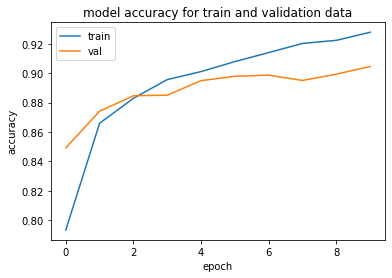

In [35]:
# TODO: Plot accuracy and loss over epochs
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('model accuracy for train and validation data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

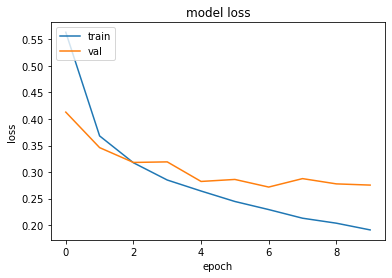

In [36]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
# TODO: Report model performance on test set
score = cnn.evaluate(xtest,ytest,verbose =0)
print(f"Test Loss: {score[0]:.3}")
print(f"Test Accuracy:{score[1]:.3}")

Test Loss: 0.284
Test Accuracy:0.9


**What do you see from the plots? Are there signs of overfitting? If so, what are 
the signs and what techniques can we use to combat overfitting?**

We observe that the training and validation losses are starting to diverge at the later epochs i.e. the loss of train is tending to be much less than validation. This gap indicates us that the model is starting to overfit the data.
We can use regularization techniques such as dropout and batch normalization to combat it.

### 4.2.4 Report metric score on test set

In [38]:
# evaluate on test set
ypred=cnn.predict(xtest)
ypred=np.argmax(ypred,axis=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Text(0.5, 1.0, 'confusion matrix for the predixtions and actiual labels for the test dataset')

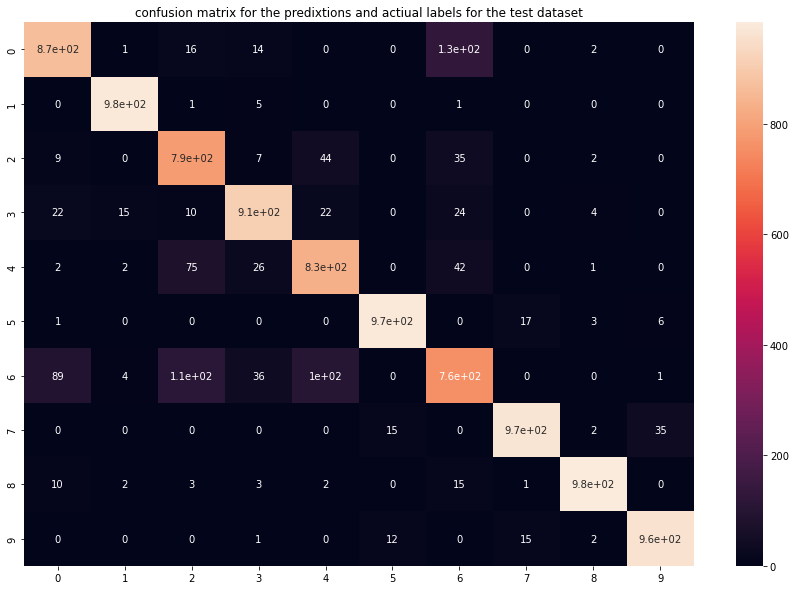

In [39]:
plt.figure(figsize = (15,10))
sns.heatmap(confusion_matrix(ypred,np.argmax(ytest,axis=1)),annot=True)
plt.title("confusion matrix for the predixtions and actiual labels for the test dataset")

### 4.3 Overfitting

### 4.3.1 Drop-out

To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.5. Train the model again for 15 epochs, use two plots to display train vs validation metric scores and train vs validation loss over each epoch. Report model performance on test set. What's your observation?

In [40]:
# TODO: build the model with drop-out layers
cnn_drop=Sequential()
cnn_drop.add(Conv2D(6,kernel_size=(5,5),activation='relu',padding='same',input_shape=(28,28,1)))
cnn_drop.add(MaxPooling2D(pool_size=(2,2)))
cnn_drop.add(Dropout(0.5))

cnn_drop.add(Conv2D(16,kernel_size=(5,5),activation='relu'))
cnn_drop.add(MaxPooling2D(pool_size=(2,2)))
cnn_drop.add(Dropout(0.5))

cnn_drop.add(Conv2D(120,kernel_size=(5,5),activation='relu'))
cnn_drop.add(Dropout(0.5))

cnn_drop.add(Flatten())
cnn_drop.add(Dense(84,activation='relu'))
cnn_drop.add(Dense(10,activation='softmax'))


In [41]:
cnn_drop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 16)         

In [42]:
cnn_drop.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
# TODO: train the model
print("Fit model on training data")
history_cnn_drop = cnn_drop.fit(
    xtrain,
    ytrain,
    batch_size=32,
    epochs=15,verbose = 1,
    validation_data=(xval, yval)
)

Fit model on training data
Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1498/1500 [============================>.] - ETA: 0s - loss: 0.8997 - accuracy: 0.6581WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd8cb4d9710> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `expor

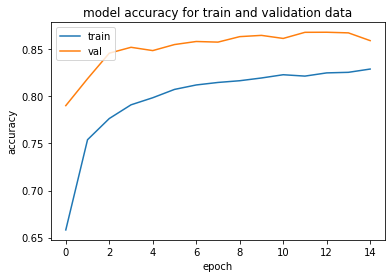

In [44]:
# TODO: plot 
plt.plot(history_cnn_drop.history['accuracy'])
plt.plot(history_cnn_drop.history['val_accuracy'])
plt.title('model accuracy for train and validation data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

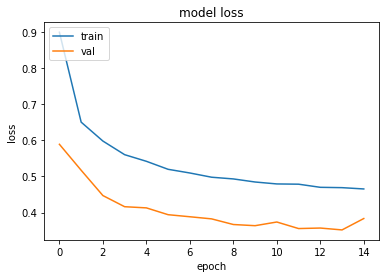

In [45]:
plt.plot(history_cnn_drop.history['loss'])
plt.plot(history_cnn_drop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
# TODO: Report model performance on test set
score = cnn_drop.evaluate(xtest,ytest,verbose =0)
print(f"Test Loss: {score[0]:.3}")
print(f"Test Accuracy:{score[1]:.3}")

Test Loss: 0.394
Test Accuracy:0.855


**What's your observation?**

**Answer:** Using this regularization technique we see that the model is no longer overfitting. This can be seen in the loss plot between validation and train data, were the loss of validation is consistently lower than the train. This indicates a good fit to the model.

### 4.3.2 Batch Normalization

This time, let's apply a batch normalization after every hidden layer, train the model for 15 epochs, plot the metric scores and loss values, and report model performance on test set as above. Compare this technique with the original model and with dropout, which technique do you think helps with overfitting better?

In [47]:
# TODO: build the model with batch normalization layers
cnn_batch=Sequential()
cnn_batch.add(Conv2D(6,kernel_size=(5,5),padding='same',input_shape=(28,28,1)))
cnn_batch.add(BatchNormalization())
cnn_batch.add(Activation('relu'))

cnn_batch.add(MaxPooling2D(pool_size=(2,2)))
cnn_batch.add(Conv2D(16,kernel_size=(5,5)))
cnn_batch.add(BatchNormalization())
cnn_batch.add(Activation('relu'))

cnn_batch.add(MaxPooling2D(pool_size=(2,2)))
cnn_batch.add(Conv2D(120,kernel_size=(5,5)))
cnn_batch.add(BatchNormalization())
cnn_batch.add(Activation('relu'))

cnn_batch.add(Flatten())
cnn_batch.add(Dense(84,activation='relu'))
cnn_batch.add(Dense(10,activation='softmax'))

In [48]:
cnn_batch.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 6)        24        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 batch_normalization_1 (Batc  (None, 10, 10, 16)      

In [49]:
cnn_batch.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
# TODO: train the model
print("Fit model on training data")
history_cnn_batch = cnn_batch.fit(
    xtrain,
    ytrain,
    batch_size=32,
    epochs=15,verbose = 1,
    validation_data=(xval, yval)
)

Fit model on training data
Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1496/1500 [============================>.] - ETA: 0s - loss: 0.4335 - accuracy: 0.8426WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd8e8d5ea70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `expor

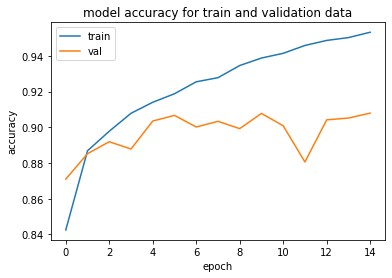

In [51]:
# TODO: plot
plt.plot(history_cnn_batch.history['accuracy'])
plt.plot(history_cnn_batch.history['val_accuracy'])
plt.title('model accuracy for train and validation data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

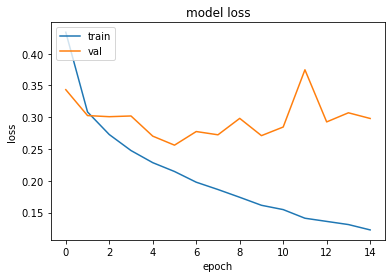

In [52]:
plt.plot(history_cnn_batch.history['loss'])
plt.plot(history_cnn_batch.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [53]:
# TODO: Report model performance on test set
score = cnn_batch.evaluate(xtest,ytest,verbose =0)
print(f"Test Loss: {score[0]:.3}")
print(f"Test Accuracy:{score[1]:.3}")

Test Loss: 0.323
Test Accuracy:0.901


**Observation, comparison with Dropout:**

**Answer**: We see that the in comparison to the vanilla CNN and the dropout version of of CNN, batch normalization helps in faster convergence of the model.Since we are runnning for same epochs, then it starts to overfit the data.Also the acccuracy of the batch normalization seems to be better compared to the other models.